<a href="https://colab.research.google.com/github/Itsbeulah/Itsbeulah/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 !mkdir -p ~/.kaggle
 !cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d faysalmiah1721758/potato-dataset

Dataset URL: https://www.kaggle.com/datasets/faysalmiah1721758/potato-dataset
License(s): CC0-1.0
 48% 18.0M/37.8M [00:00<00:00, 46.5MB/s]
100% 37.8M/37.8M [00:00<00:00, 87.5MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras


In [9]:
DATADIR = '/content/PotatoDisease'
CATEGORIES = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

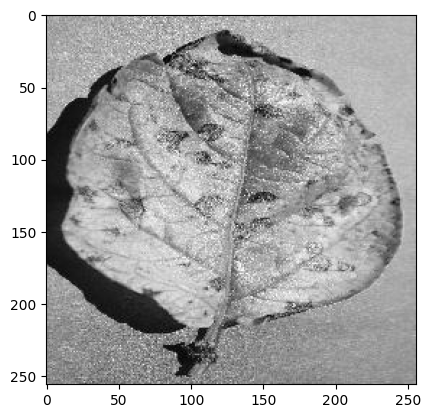

In [10]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)      #constructing the path
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

In [11]:

print(img_array)

[[172 165 185 ... 184 186 187]
 [159 164 146 ... 184 184 185]
 [164 186 149 ... 183 183 184]
 ...
 [150 130 129 ... 136 140 144]
 [135 129 128 ... 147 154 159]
 [141 169 141 ... 146 148 149]]


In [12]:
img_array.shape

(256, 256)

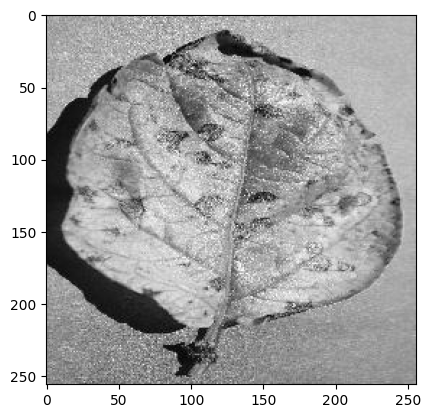

In [13]:
#GENERALIZING THE IMAGE SIZE FOR ALL IMAGES
IMG_SIZE = 256

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   #every image now will be of 50 x 50
plt.imshow(new_array, cmap = 'gray')

In [14]:
# CREATING TRAINING DATA
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)      #path to cats or dogs directory
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   #resizing images
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [15]:
print(len(training_data))

2152


In [17]:
import random
random.shuffle(training_data)

In [18]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [19]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    # last value '3' for 'color image'
y = np.array(y)


In [20]:
X = X/255

In [21]:
X

array([[[[0.7372549 ],
         [0.74509804],
         [0.81176471],
         ...,
         [0.56862745],
         [0.63529412],
         [0.6627451 ]],

        [[0.75686275],
         [0.74509804],
         [0.68627451],
         ...,
         [0.50196078],
         [0.5372549 ],
         [0.56862745]],

        [[0.73333333],
         [0.69019608],
         [0.69411765],
         ...,
         [0.59607843],
         [0.47843137],
         [0.54901961]],

        ...,

        [[0.65490196],
         [0.65490196],
         [0.64313725],
         ...,
         [0.45882353],
         [0.43529412],
         [0.60784314]],

        [[0.62352941],
         [0.63921569],
         [0.64313725],
         ...,
         [0.58039216],
         [0.6745098 ],
         [0.69019608]],

        [[0.57647059],
         [0.59607843],
         [0.61176471],
         ...,
         [0.54901961],
         [0.39215686],
         [0.5254902 ]]],


       [[[0.72941176],
         [0.69411765],
         [0.58

In [ ]:

model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size = (3,3), input_shape = X.shape[1:], activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

18/61 ━━━━━━━━━━━━━━━━━━━━ 4:12 6s/step - accuracy: 1.0000 - loss: 0.0028